In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import glob
# %matplotlib qt
import os
%load_ext autoreload
%autoreload 2
import importlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of support_files.cal_and_undistort failed: Traceback (most recent call last):
  File "/Users/samkitjain/anaconda/envs/python35/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/samkitjain/anaconda/envs/python35/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/samkitjain/anaconda/envs/python35/lib/python3.5/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/samkitjain/anaconda/envs/python35/lib/python3.5/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 626, in _exec
  File "<frozen importlib._bootstrap_external>", line 697, in exec_module
  File "<frozen importlib._bootstrap>", line 222, in _call_with_frames_removed
  File "/Users/samkitjain/Desktop/self_driving_car/Project_4/CarND-Advanced-Lane-Lines/

# Importing calibration file

In [23]:
from support_files import cal_and_undistort

# Sraight images and curved images

In [24]:
straight_images=glob.glob('test_images/straight_lines*.jpg')
curved_images=glob.glob('test_images/test*.jpg')

# Calibrating Camera

In [33]:
ret, mtx, dist, rvecs, tvecs = cal_and_undistort.calib(os.path.join('camera_cal','*jpg'))

[autoreload of support_files.cal_and_undistort failed: Traceback (most recent call last):
  File "/Users/samkitjain/anaconda/envs/python35/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/samkitjain/anaconda/envs/python35/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/samkitjain/anaconda/envs/python35/lib/python3.5/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/samkitjain/anaconda/envs/python35/lib/python3.5/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 626, in _exec
  File "<frozen importlib._bootstrap_external>", line 697, in exec_module
  File "<frozen importlib._bootstrap>", line 222, in _call_with_frames_removed
  File "/Users/samkitjain/Desktop/self_driving_car/Project_4/CarND-Advanced-Lane-Lines/

In [86]:
mtx=np.array([[  2.62633388e+03,   0.00000000e+00,   6.53633687e+02],
       [  0.00000000e+00,   3.09765919e+03,   3.31295828e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

dist=np.array([[ -2.37078716e+00,   3.99793678e+01,   2.16836492e-02,
         -1.09082278e-02,  -4.97428018e+02]])

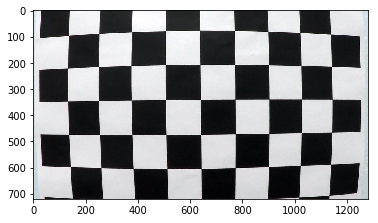

In [34]:
ref_img=cv2.imread('camera_cal/calibration1.jpg')
plt.imshow(ref_img)

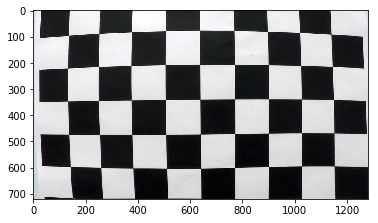

In [35]:
undist_ref_img=cal_and_undistort.undistort(ref_img,mtx,dist)
plt.imshow(undist_ref_img)

# Undistorting Image

In [36]:
image=straight_images[0]
image=mpimg.imread(image)

In [37]:
undist_image=cal_and_undistort.undistort(image,mtx,dist)

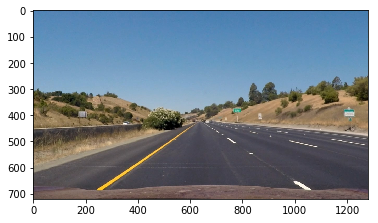

In [38]:
plt.imshow(undist_image)

# Gradient & Color Thresholds

In [39]:
from support_files.thresholding import *

In [40]:
thresh_image=gradient_color_thresh(undist_image)

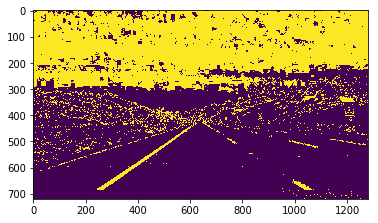

In [41]:
plt.imshow(thresh_image)

In [42]:
def abs_sobel_thresh(image,orient,  thresh=(20, 100)):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    if orient=='x':
        sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0)
        sobelx=np.absolute(sobelx)
        scaled_sobel=np.uint8(255*sobelx/np.max(sobelx))
        sx_binary=np.zeros_like(scaled_sobel)
        sx_binary[(scaled_sobel>=thresh[0]) & (scaled_sobel<=thresh[1])]=1
        binary_output=np.copy(sx_binary)
    if orient=='y':
        sobely=cv2.Sobel(gray,cv2.CV_64F,0,1)
        sobely=np.absolute(sobely)
        scaled_sobel=np.uint8(255*sobely/np.max(sobely))
        sx_binary=np.zeros_like(scaled_sobel)
        sx_binary[(scaled_sobel>=thresh[0]) & (scaled_sobel<=thresh[1])]=1
        binary_output=np.copy(sx_binary)
    return binary_output


def mag_thresh(img, mag_thresh=(20,150)):
    
    # Apply the following steps to img
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0)
    sobely=cv2.Sobel(gray,cv2.CV_64F,0,1)
    sobel=np.sqrt(np.square(sobelx)+np.square(sobely))
    scaled_sobel=np.uint8(255*sobel/np.max(sobel))
    
    t=sum((i > 150) &(i<200)  for i in scaled_sobel)
#     print(np.sum(t))
#     print(scaled_sobel.shape)
    binary_sobel=np.zeros_like(scaled_sobel)
    binary_sobel[(scaled_sobel>=mag_thresh[0]) & (scaled_sobel<=mag_thresh[1])]=1
#     print(mag_thresh[0],mag_thresh[1])
#     binary_sobel[(scaled_sobel>=20) & (scaled_sobel<=150)]=1
#     plt.imshow(binary_sobel)
#     plt.show()
    return binary_sobel

def dir_threshold(img,  thresh=(0.7,1.3)):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sobelx=np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0))
    sobely=np.absolute(cv2.Sobel(gray,cv2.CV_64F,0,1))
    dir_=np.arctan2(sobely,sobelx)
    sx_binary = np.zeros_like(gray)
#     print(thresh[0],thresh[1])
    sx_binary[(dir_>=thresh[0]) &(dir_<=thresh[1])]=1
    binary_output=sx_binary
    return binary_output

def color_space(image,thresh=(170,255)):
    hls=cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    gray_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    l_channel=hls[:,:,1]
    s_channel=hls[:,:,2]
    s_binary=np.zeros_like(s_channel)
    
    _, gray_binary = cv2.threshold(gray_image.astype('uint8'), 150, 255, cv2.THRESH_BINARY)
    s_binary[(s_channel>=thresh[0]) & (s_channel<=thresh[1])&(l_channel>=80)]=1
    color_output=np.copy(s_binary)
    return color_output

def segregate_white_line(image,thresh=(200,255)):
    hls=cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    l_channel=hls[:,:,1]
    l_binary=np.zeros_like(l_channel)
    l_binary[((l_channel>=200)&(l_channel<=255))]=1
    return l_binary

# Function to call gradient and color thresholding

In [43]:
def gradient_color_thresh(image):
    ksize=3
    image=undistort(image)
    gradx = abs_sobel_thresh(image, orient='x', thresh=(20, 200))
    grady = abs_sobel_thresh(image, orient='y', thresh=(20, 200))
    # plt.imshow(gradx)
    # plt.show()
    # plt.imshow(grady)
    # plt.show()
    mag_binary = mag_thresh(image, mag_thresh=(20, 200))
    # plt.imshow(mag_binary)
    # plt.show()

    dir_binary = dir_threshold(image, thresh=(0.7, 1.3))
    color_binary=color_space(image,thresh=(100,255))
    
    combined = np.zeros_like(dir_binary)
    # combined[((gradx == 1)& (grady == 1)) |(color_binary==1)] = 1
    combined[(color_binary==1)|((gradx == 1)& (grady == 1)) |(mag_binary==1) &(dir_binary==1)] = 1
#     plt.imshow(combined)
#     plt.show()
    kernel = np.ones((3,3),np.uint8)
    morph_image=combined[600:,:950]
    # morph_image = cv2.morphologyEx(morph_image, cv2.MORPH_CLOSE, kernel)
    morph_image = cv2.morphologyEx(morph_image, cv2.MORPH_OPEN, kernel)
    # morph_image=cv2.erode(morph_image,kernel,iterations = 1)
    combined[600:,:950]=morph_image
    white_line=segregate_white_line(image,thresh=(200,255))
    combined=(combined)|(white_line)
    return combined

# Perspective Transform

In [44]:
def perspective_transform(image):
    src=np.float32([[195,720],[590,460],[700,460],[1120,720]])
    dst=np.float32([[350,720],[410,0],[970,0],[1000,720]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    img_size=(image.shape[1],image.shape[0])
    print(M.shape,Minv.shape)
    warped = cv2.warpPerspective(image, M, img_size, flags=cv2.INTER_LINEAR)
    return warped,Minv,M

In [45]:
binary_warped,Minv,M=perspective_transform(thresh_image)

(3, 3) (3, 3)


In [46]:
M.shape

(3, 3)

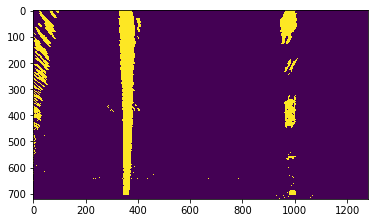

In [47]:
plt.imshow(binary_warped)

# Pipeline to detect lanes

In [48]:
def pipeline(binary_warped,count,image,undist_image):
    if count==0:
        # Assuming you have created a warped binary image called "binary_warped"
        # Take a histogram of the bottom half of the image
        histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
        # Create an output image to draw on and  visualize the result
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        midpoint = np.int(histogram.shape[0]/2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        # Choose the number of sliding windows
        nwindows = 9
        # Set height of windows
        window_height = np.int(binary_warped.shape[0]/nwindows)
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Current positions to be updated for each window
        leftx_current = leftx_base
        rightx_current = rightx_base
        # Set the width of the windows +/- margin
        margin = 100
        # Set minimum number of pixels found to recenter window
        minpix = 50
        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin
            # Draw the windows on the visualization image
            cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
            (0,255,0), 2) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
            (0,255,0), 2) 
            # Identify the nonzero pixels in x and y within the window
            good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
            (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
            (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
            # Append these indices to the lists
            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)
            # If you found > minpix pixels, recenter next window on their mean position
            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate the arrays of indices
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)

        # Extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds] 

        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)

        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
        # Minv = cv2.getPerspectiveTransform(dst, src)
        # Recast the x and y points into usable format for cv2.fillPoly()
        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        pts = np.hstack((pts_left, pts_right))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
        # Combine the result with the original image
        result = cv2.addWeighted(undist_image, 1, newwarp, 0.3, 0)
        
        y_eval=700
        mid_x=640
        ym_per_pix=3.0/72.0
        xm_per_pix=3.7/650.0 #HardCoded
        
        c1=(2*right_fit[0]*y_eval+right_fit[1])*xm_per_pix/ym_per_pix
        c2=2*right_fit[0]*xm_per_pix/(ym_per_pix**2)
        
        curvature=((1+c1*c1)**1.5)/(np.absolute(c2))
        
        left_pos=(left_fit[0]*(y_eval**2))+(left_fit[1]*y_eval)+left_fit[2]
        right_pos=(right_fit[0]*(y_eval**2))+(right_fit[1]*y_eval)+right_fit[2]
        
        dx=((left_pos+right_pos)/2-mid_x)*xm_per_pix
        if dx>0:
            text='Left'
        else:
            text='Right'
        
        font=cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(result,'Radius of curvature  = %.2f m'%(curvature),(20,50), font, 1,(255,255,255),2,cv2.LINE_AA)
        
        cv2.putText(result,'Vehicle position : %.2f m %s of center'%(abs(dx), text),(20,90),
                        font, 1,(255,255,255),2,cv2.LINE_AA)
        
        return result
    

In [49]:
count=0

In [50]:
result=pipeline(binary_warped,count,image,undist_image)

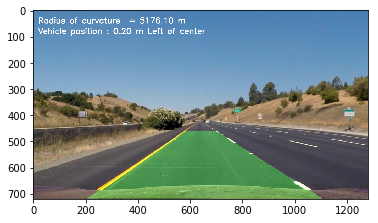

In [51]:
plt.imshow(result)

In [52]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [53]:
from support_files.pipeline import pipeline
from support_files.draw_line import line

In [54]:
line_=line()
pipeline.set_vals(line_,mtx,dist,M,Minv)
video_output = 'project_videos_output/new_result_video1.mp4'
clip1 = VideoFileClip("project_video.mp4")
video_clip = clip1.fl_image(pipeline.Pipeline)
%time video_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video project_videos_output/new_result_video1.mp4
[MoviePy] Writing video project_videos_output/new_result_video1.mp4


100%|█████████▉| 1260/1261 [06:34<00:00,  3.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_videos_output/new_result_video1.mp4 

CPU times: user 7min 7s, sys: 1min 20s, total: 8min 28s
Wall time: 6min 36s


In [39]:
line_=line()
pipeline.set_vals(line_,mtx,dist,M,Minv)
video_output = 'project_videos_output/new_result_challenge_video.mp4'
clip1 = VideoFileClip("challenge_video.mp4")
video_clip = clip1.fl_image(pipeline.Pipeline)
%time video_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video project_videos_output/new_result_challenge_video.mp4
[MoviePy] Writing video project_videos_output/new_result_challenge_video.mp4


100%|██████████| 485/485 [02:37<00:00,  3.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_videos_output/new_result_challenge_video.mp4 

CPU times: user 3min 48s, sys: 32.5 s, total: 4min 20s
Wall time: 2min 39s


In [41]:
line_=line()
pipeline.set_vals(line_,mtx,dist,M,Minv)
video_output = 'project_videos_output/new_result_harder_challenge_video.mp4'
clip1 = VideoFileClip("harder_challenge_video.mp4")
video_clip = clip1.fl_image(pipeline.Pipeline)
%time video_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video project_videos_output/new_result_harder_challenge_video.mp4
[MoviePy] Writing video project_videos_output/new_result_harder_challenge_video.mp4


100%|█████████▉| 1199/1200 [07:52<00:00,  2.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_videos_output/new_result_harder_challenge_video.mp4 

CPU times: user 10min 6s, sys: 1min 39s, total: 11min 46s
Wall time: 7min 55s


In [187]:
def process_image(image):
    undist_image=undistort(image)
#     gray_image=cv2.cvtColor(undist_image,cv2.COLOR_RGB2GRAY)
    thresh_image=gradient_color_thresh(undist_image)
    warped,Minv=perspective_transform(thresh_image)
    result=pipeline(warped,undist_image,left_fit,right_fit,count,Minv)
    return result